In [2]:
#Import dataset using pandas
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns

from matplotlib import pyplot as plt
from pandas import plotting

In [3]:
#Overview of the dataset in the csv file
insurance_dataset = pd.read_csv("insurance.csv")

print(insurance_dataset)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [4]:
type(insurance_dataset)

pandas.core.frame.DataFrame

In [5]:
#Number of rows and columns in the dataset (excluding header)

insurance_dataset.shape

(1338, 7)

In [6]:
#Dataset overview 

insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
#Gives us information on the tailend of the dataset 

insurance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [8]:
insurance_dataset.sample(100)

,age,sex,bmi,children,smoker,region,charges
919,35,female,34.210,1,no,southeast,5245.22690
547,54,female,46.700,2,no,southwest,11538.42100
1050,44,female,36.955,1,no,northwest,8023.13545
48,60,female,24.530,0,no,southeast,12629.89670
816,24,female,24.225,0,no,northwest,2842.76075
...,...,...,...,...,...,...,...
916,43,female,26.885,0,yes,northwest,21774.32215
801,64,female,35.970,0,no,southeast,14313.84630
337,62,male,27.550,1,no,northwest,13937.66650
268,45,male,30.200,1,no,southwest,7441.05300


In [ ]:
#Review dataset headings (region, age, children etc) to see if the data is fairly distributed
#i.e. data from all regions is pretty fairly distributed whereas smokers is not
specific_data=insurance_dataset[["age", "sex", "bmi", "children", "smoker", "region", "charges"]]

print(specific_data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [10]:
specific_data["age"].value_counts()

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64

In [11]:
specific_data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [12]:
specific_data["bmi"].value_counts()

32.300    13
28.310     9
31.350     8
30.800     8
30.875     8
          ..
20.100     1
29.545     1
37.900     1
25.520     1
24.090     1
Name: bmi, Length: 548, dtype: int64

In [13]:
specific_data["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [14]:
specific_data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [15]:
specific_data["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [16]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [18]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
#replace missing values with nan (none in dataset)
insurance_dataset = insurance_dataset.replace('', np.nan)

In [20]:
data_no_duplicates = insurance_dataset.drop_duplicates()
data_no_duplicates.shape

(1337, 7)

In [21]:
insurance_dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [22]:
#create a list to view multiple columns 
print(insurance_dataset[['age', 'charges']])

      age      charges
0      19  16884.92400
1      18   1725.55230
2      28   4449.46200
3      33  21984.47061
4      32   3866.85520
...   ...          ...
1333   50  10600.54830
1334   18   2205.98080
1335   18   1629.83350
1336   21   2007.94500
1337   61  29141.36030

[1338 rows x 2 columns]


In [23]:
#or you can put this in a list and then print
subset = insurance_dataset[['age', 'charges']]

subset.head()

,age,charges
0,19,16884.92400
1,18,1725.55230
2,28,4449.46200
3,33,21984.47061
4,32,3866.85520


In [24]:
#iloc (integer location) can be used to get single or multiple rows of data from the dataset
print(insurance_dataset.iloc[1:3])

   age   sex    bmi  children smoker     region    charges
1   18  male  33.77         1     no  southeast  1725.5523
2   28  male  33.00         3     no  southeast  4449.4620


In [25]:
#sorting values by charges: initial trend in cost and smoker status against increase in charges
insurance_dataset.sort_values('charges')

,age,sex,bmi,children,smoker,region,charges
940,18,male,23.210,0,no,southeast,1121.87390
808,18,male,30.140,0,no,southeast,1131.50660
1244,18,male,33.330,0,no,southeast,1135.94070
663,18,male,33.660,0,no,southeast,1136.39940
22,18,male,34.100,0,no,southeast,1137.01100
...,...,...,...,...,...,...,...
819,33,female,35.530,0,yes,northwest,55135.40209
577,31,female,38.095,1,yes,northeast,58571.07448
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [26]:
#can use sort to arrange the data and specify what column values you want and in which order
insurance_dataset.sort_values(['age','charges'], ascending=False)

,age,sex,bmi,children,smoker,region,charges
1241,64,male,36.96,2,yes,southeast,49577.66240
328,64,female,33.80,1,yes,southwest,47928.03000
94,64,female,31.30,2,yes,southwest,47291.05500
420,64,male,33.88,0,yes,southeast,46889.26120
62,64,male,24.70,1,no,northwest,30166.61817
...,...,...,...,...,...,...,...
22,18,male,34.10,0,no,southeast,1137.01100
663,18,male,33.66,0,no,southeast,1136.39940
1244,18,male,33.33,0,no,southeast,1135.94070
808,18,male,30.14,0,no,southeast,1131.50660


In [27]:
#Using a column, we can generate the sum, mean and median using simple functions 

sum_data = insurance_dataset["charges"].sum()
mean_data = insurance_dataset["charges"].mean()
median_data = insurance_dataset["charges"].median()

print("Sum:", sum_data, "\nMean:", mean_data, "\nMedian:", median_data)

Sum: 17755824.990759 
Mean: 13270.422265141257 
Median: 9382.033


In [28]:
#column name, no missing data in the dataset as non-null objects is the same as count
#int, string (objects), floats
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [29]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
insurance_dataset['sex'] = label_encoder.fit_transform(insurance_dataset['sex'])
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [30]:
insurance_dataset['smoker'] = label_encoder.fit_transform(insurance_dataset['smoker'])
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [31]:
insurance_dataset['region'] = label_encoder.fit_transform(insurance_dataset['region'])
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


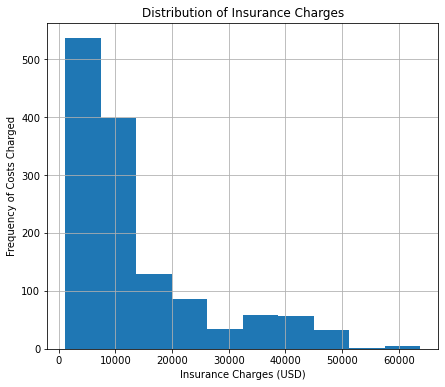

In [32]:
plt.figure(figsize=(7,6))
insurance_dataset['charges'].hist()
plt.ylabel('Frequency of Costs Charged')
plt.xlabel('Insurance Charges (USD)')
plt.title('Distribution of Insurance Charges')
plt.plot(colour="green")
plt.show()

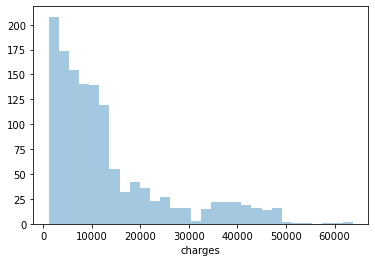

In [33]:
sns.distplot(insurance_dataset.charges, kde = False)

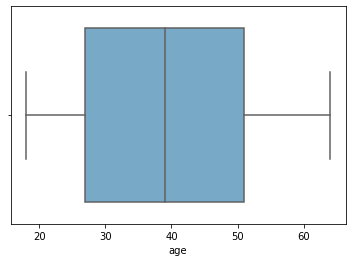

In [34]:
#distribution of continous data 
sns.boxplot(insurance_dataset['age'], palette="Blues")

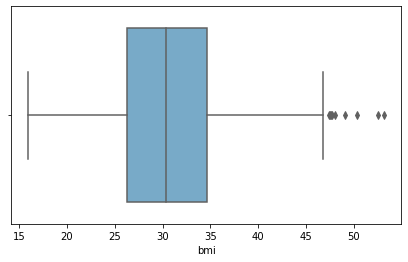

In [35]:
#revealing outliers in the dataset using boxplots
plt.figure(figsize=(7,4))
sns.boxplot(insurance_dataset['bmi'], palette="Blues")

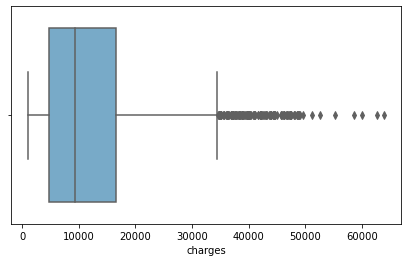

In [36]:
#revealing outliers in the dataset using boxplots
plt.figure(figsize=(7,4))
sns.boxplot(insurance_dataset['charges'], palette="Blues")

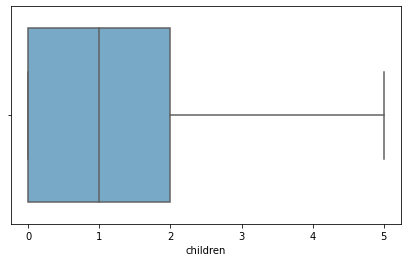

In [37]:
plt.figure(figsize=(7,4))
sns.boxplot(insurance_dataset['children'], palette="Blues")

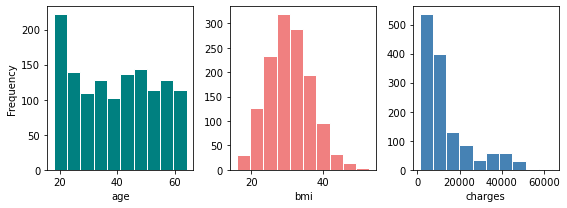

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (8,3))

ax1.hist(insurance_dataset['age'], color = 'teal', edgecolor = 'white', align = 'mid')
ax1.set_xlabel('age')
ax1.set_ylabel('Frequency')

ax2.hist(insurance_dataset['bmi'], color = 'lightcoral', edgecolor = 'white', align = 'mid')
ax2.set_xlabel('bmi')

ax3.hist(insurance_dataset['charges'], color = 'steelblue', edgecolor = 'white', align = 'mid')
ax3.set_xlabel('charges')

plt.tight_layout()
plt.show()

fig.savefig('DistributionHistogram')

<b>seaborn scatterplot

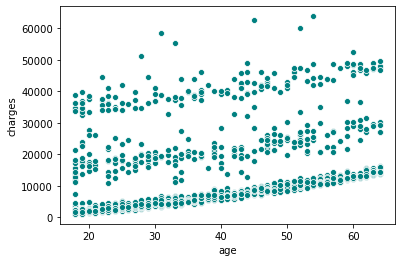

In [39]:
#plt.title('Age vs. Charges')
sns.scatterplot(data=insurance_dataset, x="age", y="charges", color='teal')
fig.savefig('fig2')

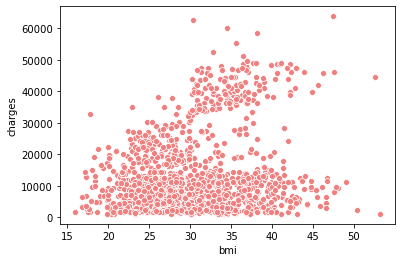

In [40]:
#plt.title('bmi vs. Charges')
sns.scatterplot(data=insurance_dataset, x="bmi", y="charges", color='lightcoral')
fig.savefig('fig3')

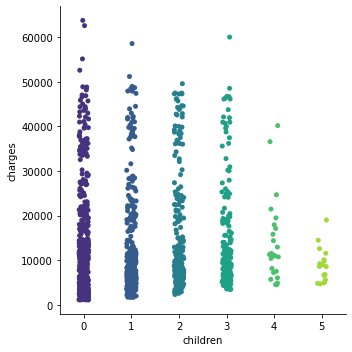

In [41]:
sns.catplot(data=insurance_dataset, x="children", y="charges", hue="children", legend="title", palette="viridis")
fig.savefig('fig4')

<Figure size 720x720 with 0 Axes>

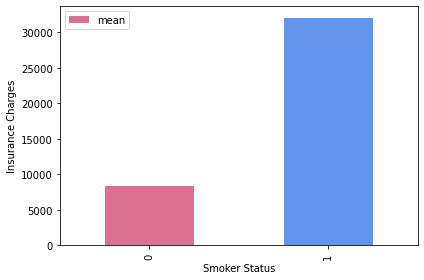

In [411]:
plt.figure(figsize=(10,10))
colours = [['palevioletred', 'cornflowerblue']]
insurance_dataset.groupby(['smoker'])['charges'].agg(['mean']).plot.bar(color = colours)
plt.ylabel('Insurance Charges')
plt.xlabel('Smoker Status')
#plt.title('Smoker Status & Insurance Charges')
plt.tight_layout()

Text(0.5, 0, 'Sex')

<Figure size 1440x720 with 0 Axes>

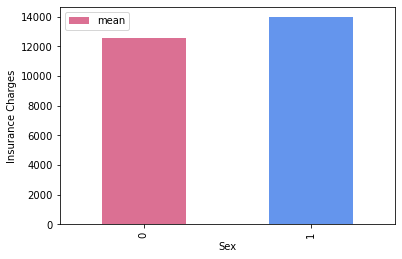

In [396]:
#Fairly even distribution for the feature sex by using value counts: male - 676, female - 662, Name: sex, dtype: int64
#To see if sex plays a role or has an influence on the costs charged to this sample of US residents, I used a barchat as shown below
plt.figure(figsize=(20,10)) 
colours = [['palevioletred', 'cornflowerblue']]
insurance_dataset.groupby(['sex'])['charges'].agg(['mean']).plot.bar(color = colours)
plt.ylabel('Insurance Charges')
plt.xlabel('Sex')
#plt.title('Insurance Charges Sex Distribution')

Text(0.5, 0, 'Region')

<Figure size 1440x720 with 0 Axes>

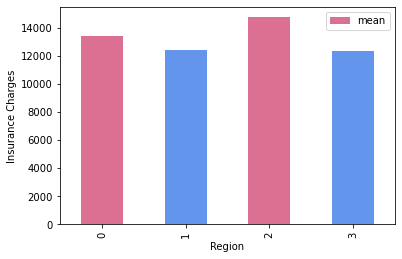

In [406]:
plt.figure(figsize=(20,10)) 
colours = [['palevioletred', 'cornflowerblue']]
insurance_dataset.groupby(['region'])['charges'].agg(['mean']).plot.bar(color = colours)
plt.ylabel('Insurance Charges')
plt.xlabel('Region')

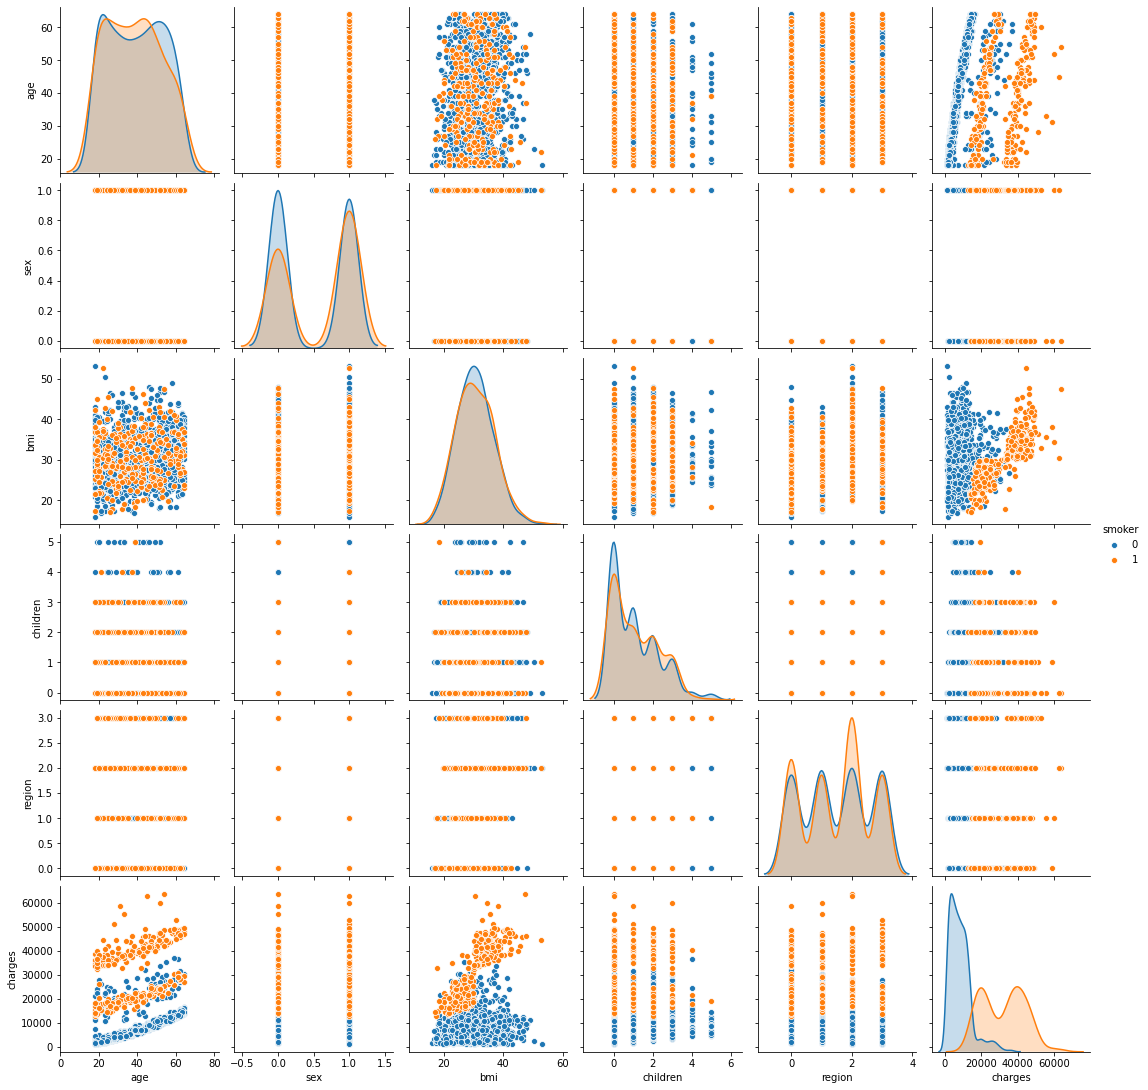

In [397]:
sns.pairplot(insurance_dataset, hue="smoker")

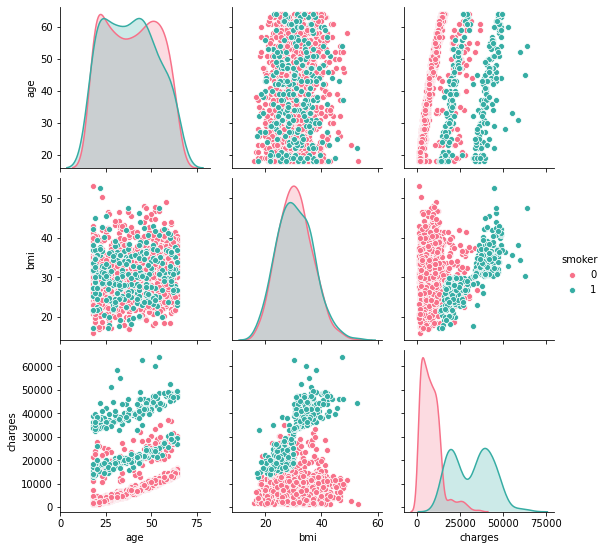

In [398]:
sns.pairplot(insurance_dataset, 
            x_vars =["age", "bmi", "charges"],
            y_vars =["age", "bmi", "charges"],
            hue = "smoker", palette = "husl")

<b>Seaborn Insurance Data Correlation Heatmap - to understand the correlations between the features 

In [293]:
insurance_dataset.corr(method='pearson')

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


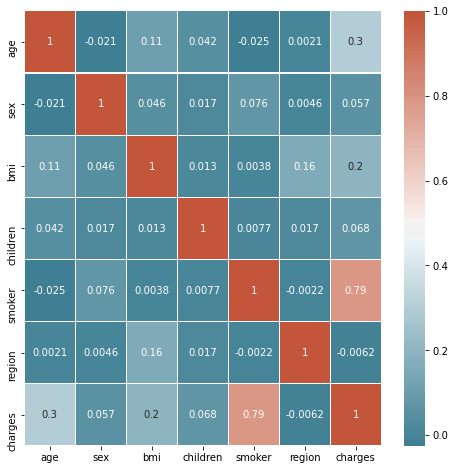

In [382]:
plt.figure(figsize=(8,8))
sns.heatmap(insurance_dataset.corr(), linecolor = 'white', linewidths = 0.1, annot=True, cmap=sns.diverging_palette(220, 20, n=200))
plt.savefig('CorrelationHeatmap')

From this analysis, it is apparant that smoker status and bmi show the most positive relationship. So lets explore this further...

In [485]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [550]:
#first split data into x and y arrays for features and target variable to predict
X = insurance_dataset[['age', 'sex', 'bmi','smoker', 'children']]
y = insurance_dataset['charges']


In [551]:
#test train split for supervised learning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [552]:
len(X_test)

402

In [553]:
len(X_train)

936

In [554]:
#train and test model
model = LinearRegression()

#fit linear model by passing training dataset
model.fit(X_train,y_train)

LinearRegression()

In [555]:
#predictions from model
predictions = model.predict(X_test)

In [556]:
model.score(X_train, y_train)

0.7489214350239646